In [1]:
! git clone https://github.com/muxspace/facial_expressions.git

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14214, done.
remote: Total 14214 (delta 0), reused 0 (delta 0), pack-reused 14214 (from 1)
Receiving objects: 100% (14214/14214), 239.65 MiB | 17.45 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Updating files: 100% (13996/13996), done.


In [2]:
import pandas as pd
dataset = pd.read_csv('/content/facial_expressions/data/legend.csv')
data = {}
for image, emotion in zip(dataset['image'], dataset['emotion']) :
  key = emotion.lower()
  if key in data :
    data[key].append(image)
  else :
    data[key] = [image]

#Alternate method to create dataset

#import csv
#data = {}
#with open('/content/facial_expressions/data/legend.csv') as f:
#  reader = csv.reader(f)
#  next(reader)
#  for row in reader:
#    key = row[2].lower()
#    if key in data:
#      data[key].append(row[1])
#    else:
#      data[key] = [row[1]]

In [3]:
dataset

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral
...,...,...,...
13685,jhamski,SharmilaTagore_80.jpg,HAPPINESS
13686,jhamski,SharmilaTagore_81.jpg,HAPPINESS
13687,jhamski,SharmilaTagore_82.jpg,HAPPINESS
13688,jhamski,SharmilaTagore_83.jpg,HAPPINESS


In [4]:
data

{'anger': ['facial-expressions_2868588k.jpg',
  'Alejandro_Toledo_0004.jpg',
  'Alexander_Lukashenko_0001.jpg',
  'Alicia_Hollowell_0001.jpg',
  'Alvaro_Noboa_0002.jpg',
  'Al_Gore_0002.jpg',
  'Anastasia_Myskina_0001.jpg',
  'Anastasia_Myskina_0003.jpg',
  'Angelina_Jolie_0005.jpg',
  'Arnold_Schwarzenegger_0023.jpg',
  'Atal_Bihari_Vajpayee_0010.jpg',
  'Ben_Braun_0001.jpg',
  'Billy_Crystal_0004.jpg',
  'Billy_Donovan_0001.jpg',
  'Bill_Graham_0005.jpg',
  'Bob_Huggins_0001.jpg',
  'Bob_Huggins_0004.jpg',
  'Brian_Scalabrine_0001.jpg',
  'Bud_Selig_0004.jpg',
  'Carlos_Arroyo_0001.jpg',
  'Carlos_Ortega_0001.jpg',
  'Celine_Dion_0008.jpg',
  'Charles_Moose_0001.jpg',
  'Charles_Moose_0002.jpg',
  'Charles_Moose_0004.jpg',
  'Charles_Moose_0006.jpg',
  'Charles_Moose_0013.jpg',
  'Colin_Powell_0007.jpg',
  'Colin_Powell_0030.jpg',
  'Colin_Powell_0043.jpg',
  'Colin_Powell_0055.jpg',
  'Colin_Powell_0149.jpg',
  'Colin_Powell_0180.jpg',
  'Colin_Powell_0181.jpg',
  'Colin_Powell_0188

In [5]:
import os
os.mkdir('master_data')
os.mkdir('master_data/training')
os.mkdir('master_data/testing')

In [6]:
emotion_list = list(data.keys())
emotion_list

['anger',
 'surprise',
 'disgust',
 'fear',
 'neutral',
 'happiness',
 'sadness',
 'contempt']

In [7]:
for emotion in emotion_list:
  os.mkdir(os.path.join('master_data/training', emotion))
  os.mkdir(os.path.join('master_data/testing', emotion))

In [8]:
split_size = 0.8
k = []
for emotion, images in data.items():
  train_size = int(split_size*len(images))
  train_images = images[ : train_size]
  test_images = images[train_size : ]
  for image in test_images:
      k.append(type(image))

from collections import Counter
element_count = Counter(k)
element_count_dict = dict(element_count)
print(element_count_dict)

{<class 'str'>: 2742}


In [9]:
from shutil import copyfile
import os
split_size = 0.8
for emotion, images in data.items():
  train_size = int(split_size*len(images))
  train_images = images[ : train_size]
  test_images = images[train_size : ]
  for image in train_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/training', emotion, image)
    copyfile(source, dest)
  for image in test_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/testing', emotion, image)
    copyfile(source, dest)


(350, 350)


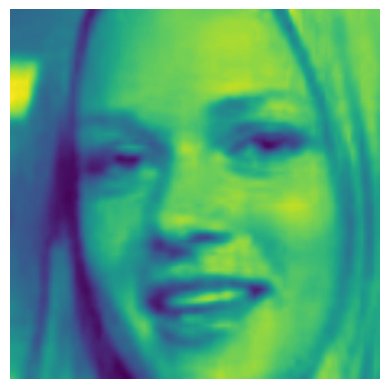

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = '/content/facial_expressions/images/AJ_Cook_0001.jpg'
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
image = np.array(image)
print(image.shape)

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [12]:
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(32 ,(3,3) ,activation = 'relu', input_shape = (100,100,3),  padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 ,(3,3) ,activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(8, activation = 'softmax'))
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

#Alternate way to create model
#model = tf.keras.models.Sequential([Conv2D(16, (5,5), activation = 'relu', input_shape  = (100,100,3)),
#                                                          MaxPooling2D(2,2),
#                                                          Conv2D(32, (3,3), activation = 'relu'),
#                                                          MaxPooling2D(2,2),
#                                                          Conv2D(64, (3,3), activation = 'relu'),
#                                                          MaxPooling2D(2,2),
#                                                          Flatten(),
#                                                          Dense(1024, activation = 'relu'),
#                                                         Dense(8, activation = 'softmax')])
#model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      20,480,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,504,008 (78.22 MB)

 Trainable params: 20,504,008 (78.22 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
train_dir = '/content/master_data/training'
test_dir = '/content/master_data/testing'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (100,100), class_mode = 'categorical', batch_size = 64)

test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (100,100), class_mode = 'categorical', batch_size = 64)

#To apply EarlyStopping
#es = EarlyStopping(monitor = 'valacc', patience = 2, min_delta = 0.01)

Found 10941 images belonging to 8 classes.
Found 2742 images belonging to 8 classes.


In [16]:
model.fit(train_generator, epochs = 10, verbose = 1, validation_data = test_generator)

Epoch 1/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.7818 - loss: 0.6001 - val_accuracy: 0.6521 - val_loss: 1.0457
Epoch 2/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.7959 - loss: 0.5690 - val_accuracy: 0.6185 - val_loss: 1.3912
Epoch 3/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.7902 - loss: 0.5693 - val_accuracy: 0.6488 - val_loss: 1.2711
Epoch 4/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.8063 - loss: 0.5449 - val_accuracy: 0.6349 - val_loss: 1.2747
Epoch 5/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.8081 - loss: 0.5412 - val_accuracy: 0.6375 - val_loss: 1.3252
Epoch 6/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - accuracy: 0.8136 - loss: 0.5045 - val_accuracy: 0.6528 - val_loss: 1.3685
Epoch 7/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.8167 - loss: 0.5041 - val_accuracy: 0.6200 - val_loss: 1.6298
Epoch 8/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.8169 - loss: 0.5025 

In [17]:
#Using a pretrained model for training
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model with pre-trained ImageNet weights, excluding the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
for layer in base_model.layers:
    layer.trainable = False
model = models.Sequential()
model.add(base_model)  # Add the base model
model.add(layers.Flatten())  # Flatten the output of the base model
model.add(layers.Dense(512, activation='relu'))  # Add a dense layer
model.add(layers.Dropout(0.5))  # Add dropout for regularization
model.add(layers.Dense(8, activation='softmax'))  # Output layer with softmax activation
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 44s 203ms/step - accuracy: 0.6057 - loss: 3.2995 - val_accuracy: 0.6389 - val_loss: 0.9245
Epoch 2/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.7182 - loss: 0.7927 - val_accuracy: 0.6451 - val_loss: 0.9525
Epoch 3/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.7330 - loss: 0.7384 - val_accuracy: 0.6583 - val_loss: 1.0442
Epoch 4/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.7601 - loss: 0.7049 - val_accuracy: 0.6349 - val_loss: 1.0208
Epoch 5/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.7450 - loss: 0.7262 - val_accuracy: 0.6543 - val_loss: 1.0390
Epoch 6/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.7547 - loss: 0.7298 - val_accuracy: 0.6754 - val_loss: 0.9966
Epoch 7/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.7274 - loss: 0.8100 - val_accuracy: 0.6280 - val_loss: 2.0071
Epoch 8/10
171/171 ━━━━━━━━━━━━━